<a href="https://colab.research.google.com/github/turkclup/OpenCV-Projects/blob/master/Phanomkorn_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Phanomkorn Homsiang 63601218")

Phanomkorn Homsiang 63601218


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [ ]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [ ]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

In [ ]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [ ]:
print("GPU")
with tf.device("/gpu:0"):
    model.fit(x=x_train, 
              y=y_train,
              batch_size=64,
              epochs=10,
              validation_data=(x_val, y_val)
              )

GPU
Epoch 1/10
907/907 [==============================] - 7s 4ms/step - loss: 2.0441 - accuracy: 0.2310 - val_loss: 0.3932 - val_accuracy: 0.8905
Epoch 2/10
907/907 [==============================] - 3s 4ms/step - loss: 0.4514 - accuracy: 0.8575 - val_loss: 0.2562 - val_accuracy: 0.9275
Epoch 3/10
907/907 [==============================] - 3s 4ms/step - loss: 0.3188 - accuracy: 0.8997 - val_loss: 0.2433 - val_accuracy: 0.9310
Epoch 4/10
907/907 [==============================] - 3s 4ms/step - loss: 0.2606 - accuracy: 0.9164 - val_loss: 0.1799 - val_accuracy: 0.9435
Epoch 5/10
907/907 [==============================] - 3s 3ms/step - loss: 0.2284 - accuracy: 0.9249 - val_loss: 0.1831 - val_accuracy: 0.9455
Epoch 6/10
907/907 [==============================] - 4s 4ms/step - loss: 0.2055 - accuracy: 0.9340 - val_loss: 0.1396 - val_accuracy: 0.9590
Epoch 7/10
907/907 [==============================] - 3s 4ms/step - loss: 0.1889 - accuracy: 0.9403 - val_loss: 0.1097 - val_accuracy: 0.9695
Ep

In [ ]:
print("CPU")
with tf.device("/cpu:0"):
    model.fit(x=x_train, 
              y=y_train,
              batch_size=64, 
              epochs=10,
              validation_data=(x_val, y_val)
              )

CPU
Epoch 1/10
907/907 [==============================] - 25s 27ms/step - loss: 0.1372 - accuracy: 0.9564 - val_loss: 0.0974 - val_accuracy: 0.9715
Epoch 2/10
907/907 [==============================] - 25s 28ms/step - loss: 0.1305 - accuracy: 0.9589 - val_loss: 0.0959 - val_accuracy: 0.9730
Epoch 3/10
907/907 [==============================] - 25s 28ms/step - loss: 0.1244 - accuracy: 0.9607 - val_loss: 0.1044 - val_accuracy: 0.9715
Epoch 4/10
907/907 [==============================] - 25s 27ms/step - loss: 0.1181 - accuracy: 0.9623 - val_loss: 0.1045 - val_accuracy: 0.9680
Epoch 5/10
907/907 [==============================] - 25s 28ms/step - loss: 0.1132 - accuracy: 0.9634 - val_loss: 0.0833 - val_accuracy: 0.9770
Epoch 6/10
907/907 [==============================] - 25s 28ms/step - loss: 0.1063 - accuracy: 0.9658 - val_loss: 0.0975 - val_accuracy: 0.9760
Epoch 7/10
907/907 [==============================] - 25s 28ms/step - loss: 0.1052 - accuracy: 0.9672 - val_loss: 0.0716 - val_accur

In [ ]:
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0900 - accuracy: 0.9706 - val_loss: 0.0819 - val_accuracy: 0.9750
Epoch 2/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0881 - accuracy: 0.9712 - val_loss: 0.0805 - val_accuracy: 0.9770
Epoch 3/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0850 - accuracy: 0.9729 - val_loss: 0.0577 - val_accuracy: 0.9870
Epoch 4/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0829 - accuracy: 0.9735 - val_loss: 0.0644 - val_accuracy: 0.9865
Epoch 5/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0815 - accuracy: 0.9743 - val_loss: 0.0629 - val_accuracy: 0.9865
Epoch 6/10
907/907 [==============================] - 3s 3ms/step - loss: 0.0771 - accuracy: 0.9753 - val_loss: 0.0805 - val_accuracy: 0.9775
Epoch 7/10
907/907 [==============================] - 3s 4ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0987 - val_accuracy: 0.9775
Epoch 

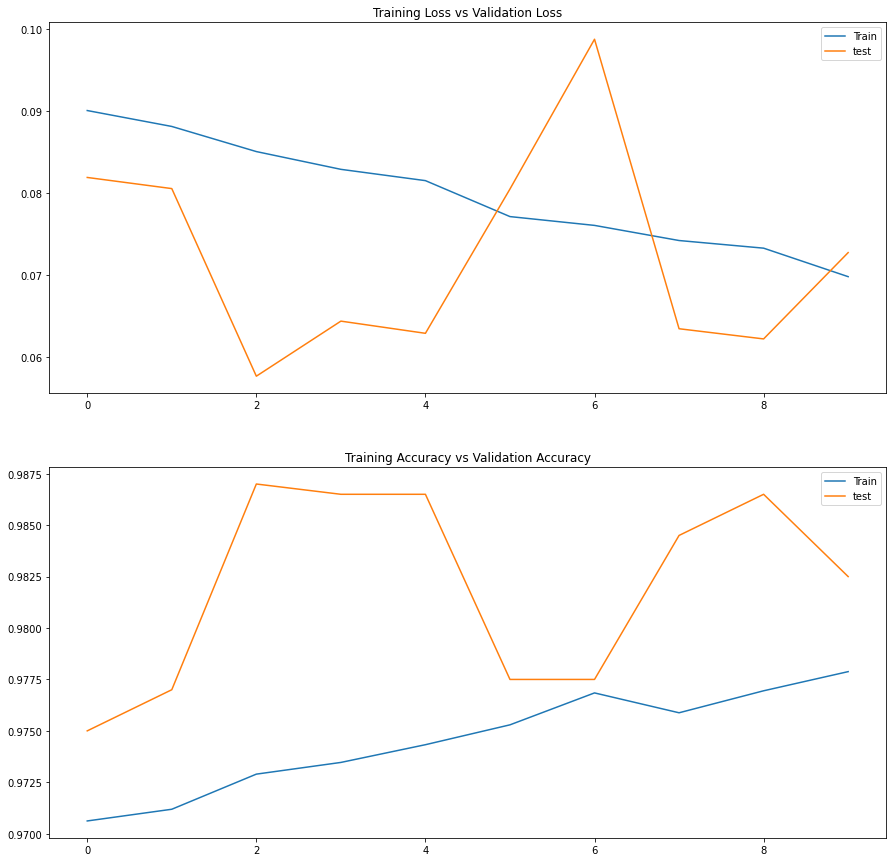

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'test'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'test'])

In [ ]:
print("GPU")
with tf.device("/gpu:0"):
    model.evaluate(x_test, y_test)

GPU
313/313 [==============================] - 1s 2ms/step - loss: 0.0911 - accuracy: 0.9719


In [ ]:
print("CPU")
with tf.device("/cpu:0"):
    model.evaluate(x_test, y_test)

CPU
313/313 [==============================] - 2s 7ms/step - loss: 0.0911 - accuracy: 0.9719


In [ ]:
# Save the trained model
model.save("Phanomkorn.h5")